In [4]:
# Imports

In [25]:
import numpy as np
import matplotlib.pyplot as plt

from astropy.time import Time
from astropy import units as u
from astropy.timeseries import TimeSeries

from astropy.timeseries import LombScargle


In [26]:
data = np.loadtxt('/Users/tonyrodriguez/Documents/Docs/SYP/Notebooks/forced_phot_efeds/129.947638_2.392059696_r.txt')

In [27]:
t = data[:,0]
flux = data[:,1]
eflux = data[:,2]

In [36]:
per=0.05379029446597774

In [37]:
frequency = np.linspace(1, 120, 1000000)
# power = LombScargle(t, flux, eflux).power(frequency)

frequency, power = LombScargle(t, flux, eflux).autopower(nyquist_factor=1000)

In [38]:
1/np.mean(np.diff(t))/2 

0.11632605528570115

In [39]:
np.max(frequency)

116.67970063675511

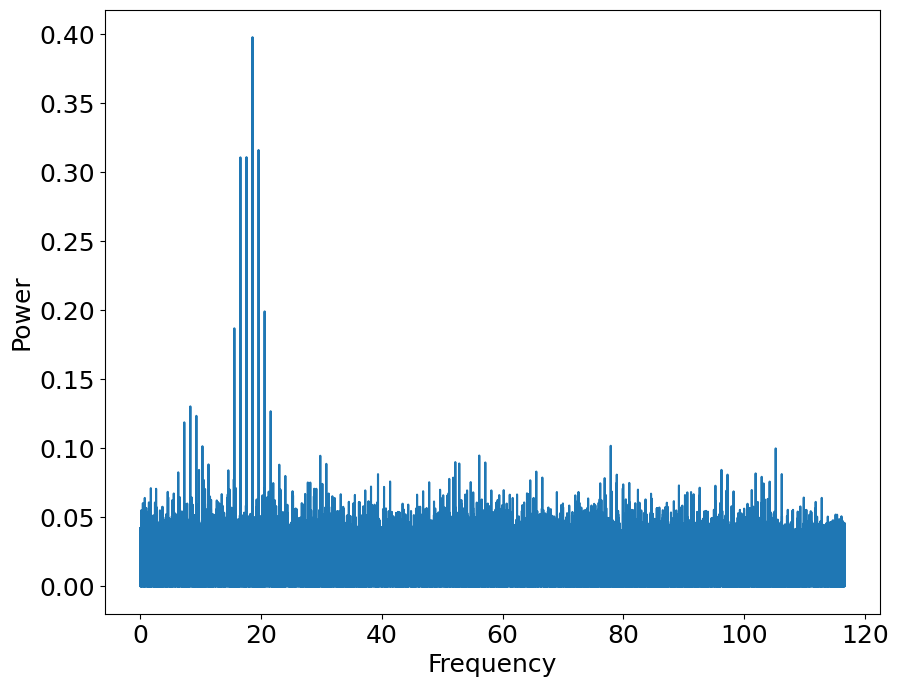

In [40]:
fig=plt.figure(figsize=(10, 8), dpi= 100)
plt.rcParams.update({'font.size': 18})

plt.plot(frequency, power)
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

In [41]:
per_found = 1/frequency[np.argmax(power)]

In [42]:
from scipy.ndimage import uniform_filter

/Users/tonyrodriguez/opt/anaconda3/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 330 of "dubious year (Note 3)"
  ErfaWarning)
/Users/tonyrodriguez/opt/anaconda3/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "utctai" yielded 1 of "dubious year (Note 3)"
  ErfaWarning)


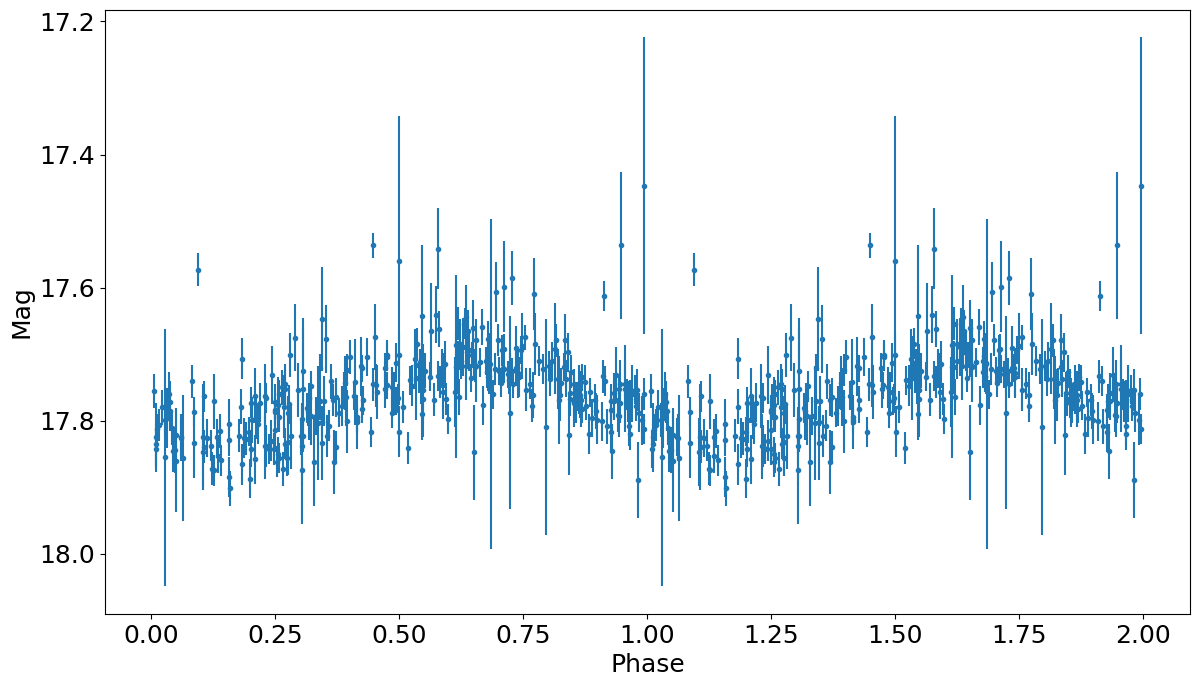

In [43]:
fig=plt.figure(figsize=(14, 8), dpi= 100)
plt.rcParams.update({'font.size': 18})
timeobject = Time(t*u.day, format='mjd')
lc_info = {'data':flux, 'time': timeobject, 'dataerr':eflux}
ts = TimeSeries(data=lc_info)
ts_folded = ts.fold(period=per_found*u.day)

plt.errorbar(ts_folded.time.jd/per+0.5, ts_folded['data'],  yerr=ts_folded['dataerr'],\
             ls='none', marker='.', color='tab:blue')
plt.errorbar(ts_folded.time.jd/per+1.5, ts_folded['data'],  yerr=ts_folded['dataerr'],\
             ls='none', marker='.', color='tab:blue')

idx_sorted = np.argsort(ts_folded.time.jd/per)
t1 = ts_folded.time.jd[idx_sorted]/per
data1 = uniform_filter(ts_folded['data'][idx_sorted], 50)
err1 = ts_folded['dataerr'][idx_sorted]

# plt.plot(t1+0.5, data1, lw=1, zorder=100, color='r')
# plt.plot(t1+1.5, data1, lw=1, zorder=100, color='r')



plt.gca().invert_yaxis()
plt.xlabel(r'Phase')
plt.ylabel('Mag')



plt.show()